<a href="https://colab.research.google.com/github/psshri/aryabhatta_robotics/blob/master/task_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
import cv2
import matplotlib.pyplot as plt

im1 = cv2.imread('IMG_0368.jpg')
im2 = cv2.imread('IMG_0369.jpg')


im1_resized = cv2.resize(im1, (224, 224), interpolation=cv2.INTER_LINEAR)
im2_resized = cv2.resize(im2, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()


In [0]:
im3 = np.concatenate((im1, im2), axis=1)

In [0]:
im3.shape

(3024, 8064, 3)

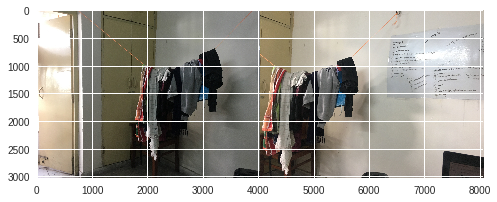

In [0]:
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
plt.show()


In [0]:
from zipfile import ZipFile
file_name = "images_image_comparison.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
original = cv2.imread('images/original_golden_bridge.jpg')

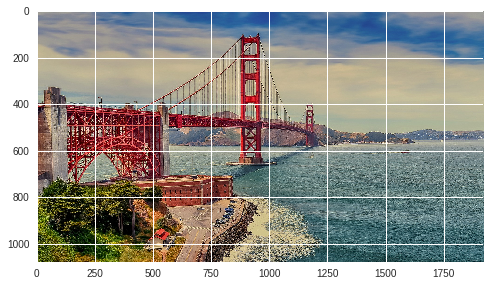

In [0]:
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
duplicate = cv2.imread('images/duplicate.jpg')

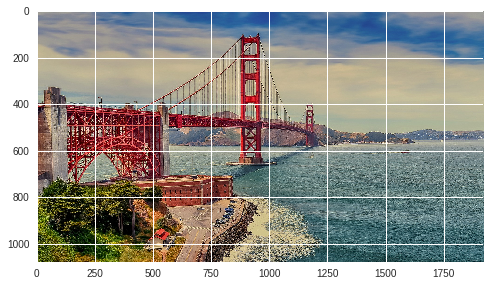

In [0]:
plt.imshow(cv2.cvtColor(duplicate, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
original.shape, duplicate.shape

((1079, 1920, 3), (1079, 1920, 3))

In [0]:
difference = cv2.subtract(original, duplicate)

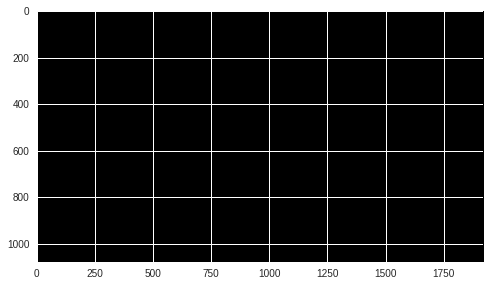

In [0]:
plt.imshow(cv2.cvtColor(difference, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
b, g, r = cv2.split(difference)
cv2.countNonZero(b)

0

https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange


In [0]:
img_ = cv2.imread('IMG_0369.jpg')
##img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)


## cv2.cvtColor convert the input rgb image into its grayscale form 

img = cv2.imread('IMG_0368.jpg')
##img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [68]:
img1.shape, img2.shape

((3024, 4032, 3), (3024, 4032, 3))

In [0]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [0]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [0]:
# Apply ratio test
good = []
for m in matches:
  if m[0].distance < 0.5*m[1].distance:
    good.append(m)
matches = np.asarray(good)

In [72]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)

    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    print(H)
else:
    raise AssertionError("Can't find enough keypoints.")  

[[ 5.41562075e-01  3.29697304e-02  1.71057385e+03]
 [-1.72813879e-01  8.67443611e-01  1.24413424e+02]
 [-1.12565447e-04  6.42360035e-06  1.00000000e+00]]


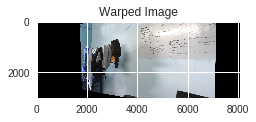

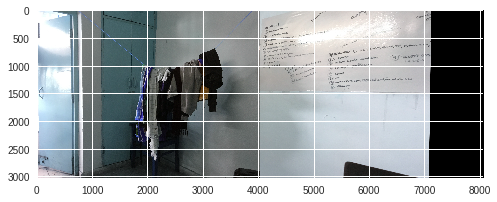

In [73]:

dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))     	
plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite('0369_0368.jpg',dst)
plt.imshow(dst)
plt.show()